# Cat and dog recognition

## Explore the Example Data
The 2,000 images used in this exercise are taken from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time and the memory.

Import os — Miscellaneous operating system interfaces, the module providing a portable way of using operating system dependent functionality. It enable to use giles, writing and reading. 
Then show the path to train and validation data which is placed as a table in the memory of service Azure Databricks.

In [0]:
import os

base_dir = r'/dbfs/FileStore/tables'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'Cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'Dogs')

Check if files are read correctly

In [0]:
os.listdir(r'/dbfs/FileStore/tables')

Out[2]: ['Train', 'Validation']

Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories. The names in validation directory are similiar.

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat_0.jpg', 'cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_101.jpg', 'cat_102.jpg', 'cat_103.jpg', 'cat_104.jpg', 'cat_105.jpg', 'cat_106.jpg']
['dog_0.jpg', 'dog_1.jpg', 'dog_10.jpg', 'dog_100.jpg', 'dog_101.jpg', 'dog_102.jpg', 'dog_103.jpg', 'dog_104.jpg', 'dog_105.jpg', 'dog_106.jpg']

Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500

For both cats and dogs, we have 1,000 training images and 500 test images.
Now let's take a look at a few pictures. First, configure the matplot parameters. Next, display some dog and cat pictures.

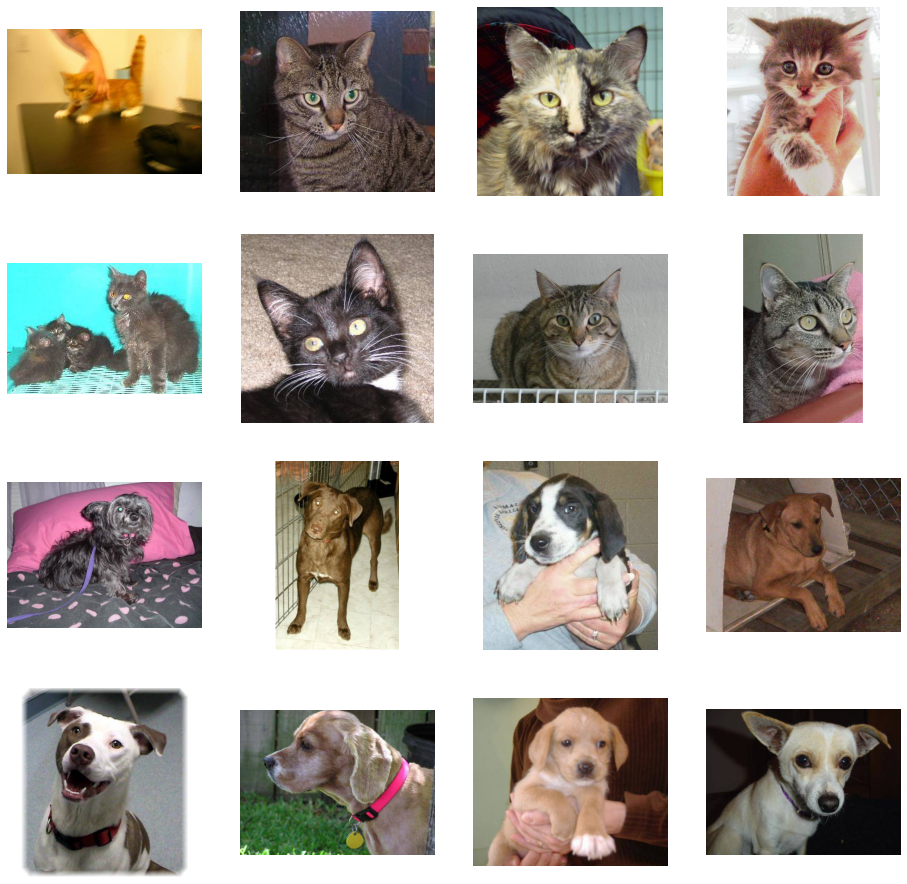

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


## Creating the ML model

Import the Tensorflow, created by Google Brain Team. It's free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

In [0]:
%pip install tensorflow-cpu==2.4.*

Python interpreter will be restarted.
Collecting tensorflow-cpu==2.4.*
 Using cached tensorflow_cpu-2.4.4-cp38-cp38-manylinux2010_x86_64.whl (144.5 MB)
Collecting h5py~=2.10.0
 Using cached h5py-2.10.0-cp38-cp38-manylinux1_x86_64.whl (2.9 MB)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow-cpu==2.4.*) (3.17.2)
Collecting typing-extensions~=3.7.4
 Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
Collecting wrapt~=1.12.1
 Using cached wrapt-1.12.1-cp38-cp38-linux_x86_64.whl
Collecting absl-py~=0.10
 Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
Collecting tensorboard~=2.4
 Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
Collecting google-pasta~=0.2
 Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Collecting tensorflow-estimator<2.5.0,>=2.4.0
 Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
Collecting grpcio~=1.32.0
 Using cached grpcio-1.32.0-cp38-cp38-manylinux2014_x86_64.whl (3.8 MB)
Collecting flatbuffers~=1.12.0
 Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
Collecting keras-preprocessing~=1.1.2
 Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Requirement already satisfied: numpy~=1.19.2 in /databricks/python3/lib/python3.8/site-packages (from tensorflow-cpu==2.4.*) (1.19.2)
Collecting gast==0.3.3
 Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
Collecting opt-einsum~=3.3.0
 Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Requirement already satisfied: six~=1.15.0 in /databricks/python3/lib/python3.8/site-packages (from tensorflow-cpu==2.4.*) (1.15.0)
Requirement already satisfied: wheel~=0.35 in /databricks/python3/lib/python3.8/site-packages (from tensorflow-cpu==2.4.*) (0.36.2)
Collecting termcolor~=1.1.0
 Using cached termcolor-1.1.0-py3-none-any.whl
Collecting astunparse~=1.6.3
 Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Collecting werkzeug>=0.11.15
 Using cached Werkzeug-2.0.2-py3-none-any.whl (288 kB)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.8/site-packages (from tensorboard~=2.4->tensorflow-cpu==2.4.*) (2.25.1)
Collecting google-auth<3,>=1.6.3
 Using cached google_auth-2.3.3-py2.py3-none-any.whl (155 kB)
Collecting google-auth-oauthlib<0.5,>=0.4.1
 Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
Requirement already satisfied: setuptools>=41.0.0 in /usr/local/lib/python3.8/dist-packages (from tensorboard~=2.4->tensorflow-cpu==2.4.*) (52.0.0)
Collecting tensorboard-data-server<0.7.0,>=0.6.0
 Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
Collecting tensorboard-plugin-wit>=1.6.0
 Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
Collecting markdown>=2.6.8
 Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
Collecting rsa<5,>=3.1.4
 Using cached rsa-4.8-py3-none-any.whl (39 kB)
Collecting cachetools<5.0,>=2.0.0
 Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
Collecting pyasn1-modules>=0.2.1
 Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
Collecting requests-oauthlib>=0.7.0
 Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
Collecting importlib-metadata>=4.4
 Using cached importlib_metadata-4.8.2-py3-none-any.whl (17 kB)
Collecting zipp>=0.5
 Using cached zipp-3.6.0-py3-none-any.whl (5.3 kB)
Collecting pyasn1<0.5.0,>=0.4.6
 Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests<3,>=2.21.0->tensorboard~=2.4->tensorflow-cpu==2.4.*) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests<3,>=2.21.0->tensorboard~=2.4->tensorflow-cpu==2.4.*) (4.0.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests<3,>=2.21.0->tensorboard~=2

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Create layers for machine learning. Choose the activate function (ReLu in this case)

In [0]:
image_input = layers.Input(shape=(100,100,3))
conv1 = layers.Conv2D(32,3,activation='relu',name='conv1')(image_input)
pool1 = layers.MaxPooling2D(2,name="pool1")(conv1)

conv2 = layers.Conv2D(32,3,activation='relu',name='conv2')(pool1)
pool2 = layers.MaxPooling2D(2,name="pool2")(conv2)

conv3 = layers.Conv2D(32,3,activation='relu',name='conv3')(pool2)
pool3 = layers.MaxPooling2D(2,name="pool3")(conv3)

flat = layers.Flatten(name="flat")(pool3)
d1 = layers.Dense(128,name="d1")(flat)
d2 = layers.Dense(64, name="d2")(d1)
out = layers.Dense(1, activation='sigmoid')(d2)
model = keras.Model(inputs = image_input, outputs = out)


Create the model. Choose the way of optimizing function of loss. For more information look into keras documentation (tf.keras.losses).

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

Generate batches of tensor image data with real-time data augmentation and read images

In [0]:
import os

base_dir = r'/dbfs/FileStore/tables'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'Cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'Dogs')

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(100,100), class_mode="binary", batch_size=20)
test_generator = test_datagen.flow_from_directory(validation_dir, target_size=(100,100), class_mode="binary", batch_size=20)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

In [0]:
%load_ext tensorboard

In [0]:
tb = keras.callbacks.TensorBoard("logs/lenet1")

Let's train created model. The number of epochs and steps per every epoch affects the time of learning. Usually, an increase improves the quality and decreases the value of the loss function, but one should remember about the possibility of overtraining the neural network.

In [0]:
history = model.fit(train_generator, 
                   steps_per_epoch=100,
                   epochs=15, 
                   batch_size=20,
                   validation_data=test_generator, 
                   validation_steps=5)

Epoch 1/15
 1/100 [..............................] - ETA: 2:03 - loss: 0.6894 2/100 [..............................] - ETA: 26s - loss: 1.0295  3/100 [..............................] - ETA: 26s - loss: 1.0678 4/100 [>.............................] - ETA: 25s - loss: 1.0587 5/100 [>.............................] - ETA: 25s - loss: 1.0402 6/100 [>.............................] - ETA: 25s - loss: 1.0201 7/100 [=>............................] - ETA: 25s - loss: 1.0010 8/100 [=>............................] - ETA: 24s - loss: 0.9839 9/100 [=>............................] - ETA: 24s - loss: 0.9686 10/100 [==>...........................] - ETA: 23s - loss: 0.9551 11/100 [==>...........................] - ETA: 23s - loss: 0.9428 12/100 [==>...........................] - ETA: 23s - loss: 0.9316 13/100 [==>...........................] - ETA: 22s - loss: 0.9216 14/100 [===>..........................] - ETA: 22s - loss: 0.9124 15/100 [===>..........................] - ETA: 22s - loss: 0.9040 16/100 [===>..........................] - ETA: 22s - loss: 0.8964 17/100 [====>.........................] - ETA: 21s - loss: 0.8894 18/100 [====>.........................] - ETA: 21s - loss: 0.8829 19/100 [====>.........................] - ETA: 21s - loss: 0.8769 20/100 [=====>........................] - ETA: 21s - loss: 0.8714 21/100 [=====>........................] - ETA: 20s - loss: 0.8661 22/100 [=====>........................] - ETA: 20s - loss: 0.8612 23/100 [=====>........................] - ETA: 20s - loss: 0.8566 24/100 [======>.......................] - ETA: 19s - loss: 0.8523 25/100 [======>.......................] - ETA: 19s - loss: 0.8482 26/100 [======>.......................] - ETA: 19s - loss: 0.8444 27/100 [=======>......................] - ETA: 19s - loss: 0.8407 28/100 [=======>......................] - ETA: 18s - loss: 0.8373 29/100 [=======>......................] - ETA: 18s - loss: 0.8340 30/100 [========>.....................] - ETA: 18s - loss: 0.8308 31/